## Summary
03/12/2022 Wanlu
The digits dataset consists of 1797 images, and each image consists of 64 pixels.

In [3]:
%pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)



You should consider upgrading via the 'C:\Users\wangu\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\wangu\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


     ------------------------------------ 292.8/292.8 KB 205.5 kB/s eta 0:00:00
     -------------------------------------- 10.6/10.6 MB 132.2 kB/s eta 0:00:00
     ------------------------------------ 503.5/503.5 KB 126.3 kB/s eta 0:00:00


In [4]:
#Import numpy
import numpy as np

#Import scikitlearn for machine learning functionalities
import sklearn
from sklearn.manifold import TSNE 
from sklearn.datasets import load_digits # For the UCI ML handwritten digits dataset

# Import matplotlib for plotting graphs ans seaborn for attractive graphics.
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
%matplotlib inline

import seaborn as sb

## Load Data

(1797, 64)


<Figure size 432x288 with 0 Axes>

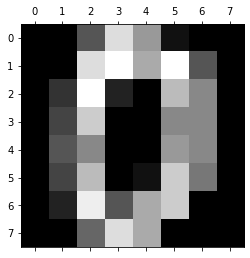

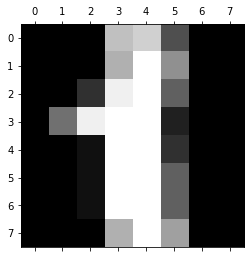

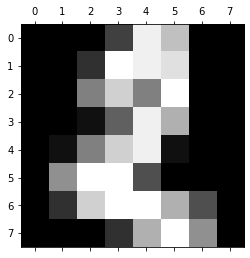

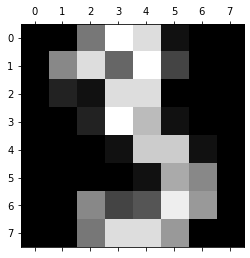

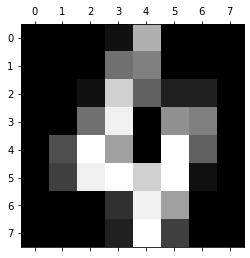

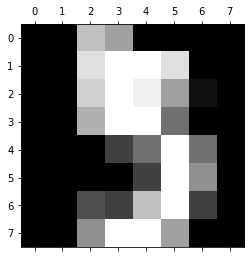

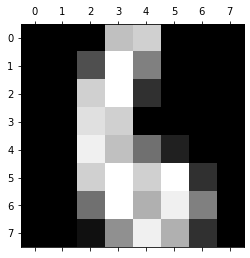

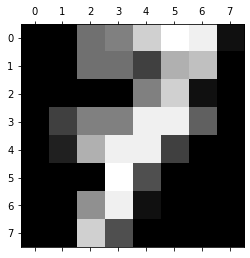

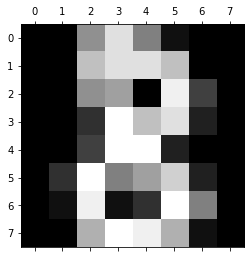

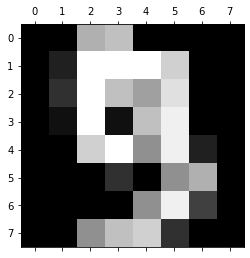

In [5]:
digits = load_digits()
print(digits.data.shape) # There are 10 classes (0 to 9) with alomst 180 images in each class 
                         # The images are 8x8 and hence 64 pixels(dimensions)
plt.gray();
#Displaying what the standard images look like
for i in range(0,10):
    plt.matshow(digits.images[i]) 
    plt.show() 

In [12]:
for i in digits:
    print(i)

data
target
frame
feature_names
target_names
images
DESCR


In [28]:
print('There are %d images in the dataset and each image consists of %d elements'%(digits.data.shape[0], digits.data.shape[1])
     )

There are 1797 images in the dataset and each image consists of 64 elements


## Apply T-SNE

Reorder the data and target

In [30]:
X = np.vstack([digits.data[digits.target==i] for i in range(10)]) # Place the arrays of data of each digit on top of each other and store in X
Y = np.hstack([digits.target[digits.target==i] for i in range(10)]) # Place the arrays of data of each target digit by the side of each other continuosly and store in Y

In [39]:
#Implementing the TSNE Function - ah Scikit learn makes it so easy!
digits_final = TSNE(perplexity=30).fit_transform(X) 
#Play around with varying the parameters like perplexity, random_state to get different plots

C:\Users\wangu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\wangu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [41]:
#With the above line, our job is done. But why did we even reduce the dimensions in the first place?
#To visualise it on a graph.

#So, here is a utility function that helps to do a scatter plot of thee transformed data 

def plot(x, colors):
  
    palette = np.array(sb.color_palette("hls", 10))  #Choosing color palette 

    # Create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    # Add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
        txts.append(txt)
    return f, ax, txts



C:\Users\wangu\AppData\Local\Temp\ipykernel_46180\4163444765.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-41.343544, 40.151535, '0'),
  Text(-11.651706, 18.78349, '1'),
  Text(-40.562183, -8.093533, '2'),
  Text(-2.170938, -26.506432, '3'),
  Text(8.916072, 54.896297, '4'),
  Text(46.876656, -16.48367, '5'),
  Text(-8.545749, -65.10704, '6'),
  Text(33.942856, 22.06938, '7'),
  Text(-2.0423908, -0.22433376, '8'),
  Text(18.416737, -22.547344, '9')])

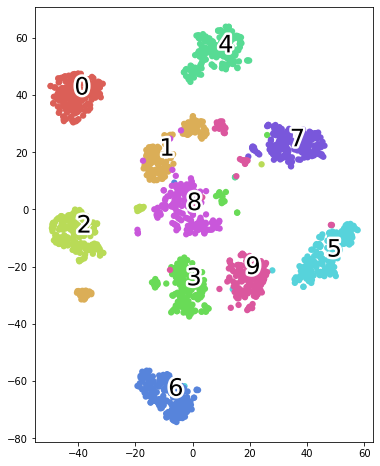

In [42]:
plot(digits_final,Y)

Try a different perplexity value

C:\Users\wangu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\wangu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\wangu\AppData\Local\Temp\ipykernel_46180\4163444765.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.sca

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(73.30248, -17.040836, '0'),
  Text(13.386495, 2.4009423, '1'),
  Text(-8.364852, -71.86941, '2'),
  Text(-64.498344, 10.89516, '3'),
  Text(29.386335, -45.999195, '4'),
  Text(2.9925876, 58.91099, '5'),
  Text(49.86041, 39.6268, '6'),
  Text(-51.44616, -36.64847, '7'),
  Text(-17.818605, 2.9473362, '8'),
  Text(-38.543816, 46.751877, '9')])

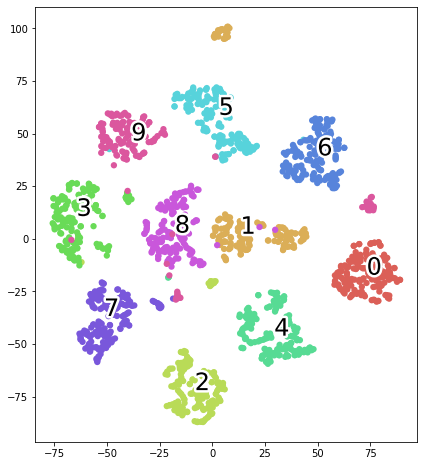

In [45]:
#Implementing the TSNE Function - ah Scikit learn makes it so easy!
digits_final = TSNE(perplexity=10).fit_transform(X) 
plot(digits_final,Y)
#Play around with varying the parameters like perplexity, random_state to get different plots

C:\Users\wangu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\wangu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\wangu\AppData\Local\Temp\ipykernel_46180\4163444765.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.sca

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(0.7575486, 65.663124, '0'),
  Text(7.416935, 18.491879, '1'),
  Text(-28.906298, 27.171162, '2'),
  Text(-24.842566, -17.506912, '3'),
  Text(52.41836, 29.038773, '4'),
  Text(15.114067, -50.456177, '5'),
  Text(-68.45464, -6.997107, '6'),
  Text(52.845074, -14.388354, '7'),
  Text(3.7314668, -3.910469, '8'),
  Text(-16.82193, -45.02368, '9')])

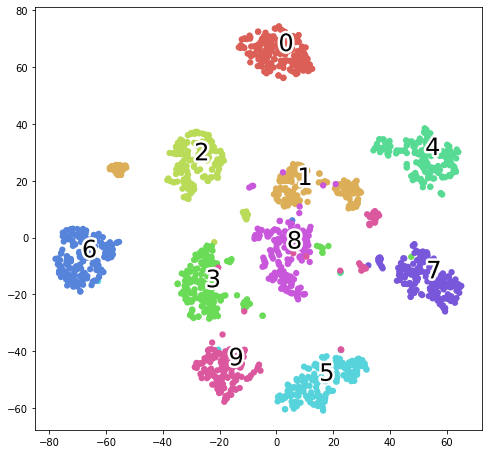

In [43]:
#Implementing the TSNE Function - ah Scikit learn makes it so easy!
digits_final = TSNE(perplexity=20).fit_transform(X) 
plot(digits_final,Y)
#Play around with varying the parameters like perplexity, random_state to get different plots

C:\Users\wangu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\wangu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\wangu\AppData\Local\Temp\ipykernel_46180\4163444765.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.sca

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(0.6147841, 56.612877, '0'),
  Text(-7.0797586, -11.189155, '1'),
  Text(23.424583, -24.16545, '2'),
  Text(29.827108, 2.2542062, '3'),
  Text(-35.971622, 12.840338, '4'),
  Text(1.9501138, 21.771446, '5'),
  Text(-3.5130022, -48.40025, '6'),
  Text(-33.51188, -13.729117, '7'),
  Text(7.3818293, -4.3406696, '8'),
  Text(20.11148, 15.415516, '9')])

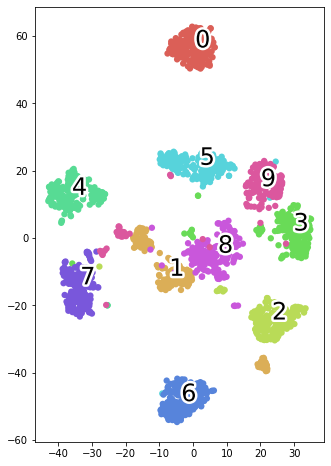

In [44]:
#Implementing the TSNE Function - ah Scikit learn makes it so easy!
digits_final = TSNE(perplexity=50).fit_transform(X) 
plot(digits_final,Y)
#Play around with varying the parameters like perplexity, random_state to get different plots